**Wichtig**:  
* Die einzulesenen Datensätze "process_data_df10.csv" und "process_data_df10.pkl" sollen im Ordner "../Data/" sein!
* Alle in diesem Notebook erzeugten Dateien werden auch in "..Data/" gespeichert.


**Notwendige Packages**: numpy, pandas, re, matplotlib, mpu

---

**Important**: 
* The dataframes "process_data_df10" and "process_data_df10.pkl" have to be in the folder "../Data"!
* All the files produced by this notebook will also be saved in "..Data/"


**Necessary Packages**: numpy, pandas, re, matplotlib, mpu


2nd Project part: Feature Engineering and Data Modeling
===

__Data Analytics für Chemieingenieure und Chemiker__

Tino Mundt, M. Sc.

Prof. Dr. Reinhard Schomäcker

__Group C:__

Frank Rudolf Hilden 364571 - Giam Chon Lee 400646 - Philippe Samuel Santos da Costa 369810 - Julian Felipe Torres Campos 402424 - Elron Elias Pens 371555

__26.01.2020__

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hinzufügen-neuer-Informationen" data-toc-modified-id="Hinzufügen-neuer-Informationen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hinzufügen neuer Informationen</a></span><ul class="toc-item"><li><span><a href="#Einlesen-der-daten" data-toc-modified-id="Einlesen-der-daten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Einlesen der daten</a></span></li><li><span><a href="#Entfernen-von-Reihen-ohne-Produktnamen" data-toc-modified-id="Entfernen-von-Reihen-ohne-Produktnamen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Entfernen von Reihen ohne Produktnamen</a></span></li><li><span><a href="#Hinzufügen-der-absoluten-und-relativen-Sollwerte" data-toc-modified-id="Hinzufügen-der-absoluten-und-relativen-Sollwerte-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hinzufügen der absoluten und relativen Sollwerte</a></span></li><li><span><a href="#Speichern-als-.csv" data-toc-modified-id="Speichern-als-.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Speichern als .csv</a></span></li></ul></li><li><span><a href="#Varianz-pro-Produkt" data-toc-modified-id="Varianz-pro-Produkt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Varianz pro Produkt</a></span><ul class="toc-item"><li><span><a href="#Removing-unnecessary-columns" data-toc-modified-id="Removing-unnecessary-columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing unnecessary columns</a></span></li><li><span><a href="#Exploring-p_product,-p_product_type-and-p_product_group" data-toc-modified-id="Exploring-p_product,-p_product_type-and-p_product_group-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploring <code>p_product</code>, <code>p_product_type</code> and <code>p_product_group</code></a></span></li></ul></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heat maps</a></span></li><li><span><a href="#Fragestellung:-relative-Abweichung-zwischen-Soll--und-Istwert->-5%-für-einzelne-Produkte.-Liegt-die-Ursache-in-einer-&quot;empfindlichen&quot;-Chemie-oder-in-der-Technik-begründet?-->-Erzeugung-eines-Dentrogrammes,-bei-größerem-Einfluss-des-Faktors-&quot;Chemie&quot;-sollten-die-einzelnen-Produkte-in-einem-Dentrogramm-nah-beeinander-gruppiert-sein." data-toc-modified-id="Fragestellung:-relative-Abweichung-zwischen-Soll--und-Istwert->-5%-für-einzelne-Produkte.-Liegt-die-Ursache-in-einer-&quot;empfindlichen&quot;-Chemie-oder-in-der-Technik-begründet?-->-Erzeugung-eines-Dentrogrammes,-bei-größerem-Einfluss-des-Faktors-&quot;Chemie&quot;-sollten-die-einzelnen-Produkte-in-einem-Dentrogramm-nah-beeinander-gruppiert-sein.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fragestellung: relative Abweichung zwischen Soll- und Istwert &gt; 5% für einzelne Produkte. Liegt die Ursache in einer "empfindlichen" Chemie oder in der Technik begründet? -&gt; Erzeugung eines Dentrogrammes, bei größerem Einfluss des Faktors "Chemie" sollten die einzelnen Produkte in einem Dentrogramm nah beeinander gruppiert sein.</a></span><ul class="toc-item"><li><span><a href="#Um-unterschiedliche-Produkte-miteinander-vergleichen-zu-können,-müssen-Prozessgrößen-normiert-werden" data-toc-modified-id="Um-unterschiedliche-Produkte-miteinander-vergleichen-zu-können,-müssen-Prozessgrößen-normiert-werden-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Um unterschiedliche Produkte miteinander vergleichen zu können, müssen Prozessgrößen normiert werden</a></span></li><li><span><a href="#Einlesen-der-Daten" data-toc-modified-id="Einlesen-der-Daten-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Einlesen der Daten</a></span></li><li><span><a href="#Vorbereiten-des-Datensatzes-für-die-Normierung" data-toc-modified-id="Vorbereiten-des-Datensatzes-für-die-Normierung-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Vorbereiten des Datensatzes für die Normierung</a></span><ul class="toc-item"><li><span><a href="#Entfernen-von-Spalten,-die-entweder-keine-Prozessgrößen-während-der-Produktion-waren-(_ref,-_richtwert)-oder-in-denen-keine-fehlerhaften/abweichenden-Prozessgrößen-enthalten-sein-können-(_median)" data-toc-modified-id="Entfernen-von-Spalten,-die-entweder-keine-Prozessgrößen-während-der-Produktion-waren-(_ref,-_richtwert)-oder-in-denen-keine-fehlerhaften/abweichenden-Prozessgrößen-enthalten-sein-können-(_median)-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Entfernen von Spalten, die entweder keine Prozessgrößen während der Produktion waren (_ref, _richtwert) oder in denen keine fehlerhaften/abweichenden Prozessgrößen enthalten sein können (_median)</a></span></li><li><span><a href="#Entfernen-von-Spalten,-die-zwar-typ:-int-oder-typ:-float-sind,-deren-Normierung-jedoch-physikalisch-nicht-sinnvoll-ist" data-toc-modified-id="Entfernen-von-Spalten,-die-zwar-typ:-int-oder-typ:-float-sind,-deren-Normierung-jedoch-physikalisch-nicht-sinnvoll-ist-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Entfernen von Spalten, die zwar typ: int oder typ: float sind, deren Normierung jedoch physikalisch nicht sinnvoll ist</a></span></li><li><span><a href="#Mittelung-von-Spalten,-welche-dieselbe-Prozessgröße-innerhalb-einer-Charge-beschreiben,-allerdings-an-unterschiedlichen-Positionen-gemessen" data-toc-modified-id="Mittelung-von-Spalten,-welche-dieselbe-Prozessgröße-innerhalb-einer-Charge-beschreiben,-allerdings-an-unterschiedlichen-Positionen-gemessen-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Mittelung von Spalten, welche dieselbe Prozessgröße innerhalb einer Charge beschreiben, allerdings an unterschiedlichen Positionen gemessen</a></span><ul class="toc-item"><li><span><a href="#Verfälschen-das-Ergebnis-des-Clusterings,-da-diese-Prozessgröße-im-Vergleich-zu-einder-anderen-mehrfach-mit-berücksichtigt-werden-würde" data-toc-modified-id="Verfälschen-das-Ergebnis-des-Clusterings,-da-diese-Prozessgröße-im-Vergleich-zu-einder-anderen-mehrfach-mit-berücksichtigt-werden-würde-4.3.3.1"><span class="toc-item-num">4.3.3.1&nbsp;&nbsp;</span>Verfälschen das Ergebnis des Clusterings, da diese Prozessgröße im Vergleich zu einder anderen mehrfach mit berücksichtigt werden würde</a></span></li><li><span><a href="#Identifizierung-einer-Charge" data-toc-modified-id="Identifizierung-einer-Charge-4.3.3.2"><span class="toc-item-num">4.3.3.2&nbsp;&nbsp;</span>Identifizierung einer Charge</a></span></li><li><span><a href="#Mittelung" data-toc-modified-id="Mittelung-4.3.3.3"><span class="toc-item-num">4.3.3.3&nbsp;&nbsp;</span>Mittelung</a></span></li></ul></li><li><span><a href="#Typfilterung" data-toc-modified-id="Typfilterung-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Typfilterung</a></span></li></ul></li><li><span><a href="#Normierung" data-toc-modified-id="Normierung-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Normierung</a></span></li><li><span><a href="#Auswählen-der-Daten-und-Erzeugung-eines-Dentrogrammes" data-toc-modified-id="Auswählen-der-Daten-und-Erzeugung-eines-Dentrogrammes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Auswählen der Daten und Erzeugung eines Dentrogrammes</a></span><ul class="toc-item"><li><span><a href="#Salzrückhalt" data-toc-modified-id="Salzrückhalt-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Salzrückhalt</a></span><ul class="toc-item"><li><span><a href="#Filterkriterium" data-toc-modified-id="Filterkriterium-4.5.1.1"><span class="toc-item-num">4.5.1.1&nbsp;&nbsp;</span>Filterkriterium</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Hinzufügen neuer Informationen
Zuerst werden die Reihen ohne Produktnamen aus dem bereits bereinigten Datensatz entfernt. Anschließend werden die absolute und relative Sollwerte für Salzrückhalt und Permeatdurchfluss hinzugefügt. Diese Werte sind in der offiziellen Lawabrane - Broschüre zu finden


### Einlesen der daten

In [2]:
import pandas as pd
import numpy as np
import csv
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from datetime import date, datetime

In [2]:
# Daten einlesen
df=pd.read_csv("process_data_df10.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                              \
  ps_dicke_4  ... p_product_type p_product_size p_effective_area_per_leaf_m2   
0      135.0  ...   6989995295da              8                       1.4646   
1      135.0  ...   6989995295da              8                       1.4646   
2      135.0  ...   6989995295da              8                       1.4646   
3      135.0  ...   6989995295da              8                       1.4646   
4      135.0  ...   6989995295da              8                       1.4646   

                                                                 \
  p_effective_pressure_bar qc_flux_l/m2/h qc_a-value_l/m2/h/bar   
0                     8.71      40.286235              4.625285   
1                     8.71      40.252401              4.621401   
2                     8.71      39.718186              4.560067   
3                     8.71      39.441426              4.528292   
4                     8.71      39.731817              4.561632   

                                                                    
  qc_b-value_m/s_10-6 qc_flux_m3/m2/day sum_of_scrap roll_position  
0            3.678446          0.966870          0.0     58.181818  
1            3.165247          0.966058          0.0    116.363636  
2            3.170593          0.953236          0.0    174.545455  
3            2.855092          0.946594          0.0    232.727273  
4            2.810373          0.953564          0.0    290.909091  

[5 rows x 343 columns]

### Entfernen von Reihen ohne Produktnamen

In [3]:
# Zu Beginn alle im DataFrame vorkommenden Produktnamen auslesen
produktnamen=list(df2['qc']['p_product_full_name'])

In [4]:
# Erzeugen eines Arrays, in welches die Sollwerte gemäß Herstellerangaben eingetragen werden
sollwerte=np.zeros((118687,2))

In [5]:
# Info zu df2 vor dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118687 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.0+ MB


In [6]:
# Produktnamen laut Herstellerangaben
# Stimmt der Produktname überein, werden die Sollwerte für den Salrückhalt (linke Spalte) und den Permatdurchsatz (rechte Spalte) eingetragen
# leere Spalten werden in der else-Bedingung aussortiert

for i in range(len(produktnamen)):
    if produktnamen[i]=='a79cf6a73839':
        sollwerte[i]=[99.8, 5.2]
        
    elif produktnamen[i]=='c807697b3c7e':
        sollwerte[i]=[99.8, 24.6]
        
    elif produktnamen[i]=='f22a7fef71c5':
        sollwerte[i]=[99.8, 27.3] 
        
    elif produktnamen[i]=='c13b2f69d3c1':
        sollwerte[i]=[99.8, 7.2]  
        
    elif produktnamen[i]=='3e94b7067349':
        sollwerte[i]=[99.8, 34.1]  
        
    elif produktnamen[i]=='3394d82edc97':
        sollwerte[i]=[99.8, 37.5]  
        
    elif produktnamen[i]=='df9e75b29918':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='316c8d1ffca1':
        sollwerte[i]=[99.5, 43.9]  
        
    elif produktnamen[i]=='5661014763c8':
        sollwerte[i]=[99.5, 8.9]  
        
    elif produktnamen[i]=='73928f2577b5':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='22227b31350f':
        sollwerte[i]=[99.5, 41.5]  
        
    elif produktnamen[i]=='df1d09e643af':
        sollwerte[i]=[99.7, 8.9]  
        
    elif produktnamen[i]=='e2b1e6e1d5f5':
        sollwerte[i]=[99.7, 37.9]  
        
    elif produktnamen[i]=='54b98d0fe2eb':
        sollwerte[i]=[99.5, 41.7]
        
    elif produktnamen[i]=='ff16223eb2bf':
        sollwerte[i]=[99.5, 39.9]
        
    elif produktnamen[i]=='0cc0ba87b12f':
        sollwerte[i]=[99.5, 7.4]        
        
    elif produktnamen[i]=='a640f68db89c':
        sollwerte[i]=[99.5, 34.8]        
        
    elif produktnamen[i]=='b3ccc5e5f9b5':
        sollwerte[i]=[99.5, 36.2]        
        
    elif produktnamen[i]=='2256f65c362b':
        sollwerte[i]=[99.5, 38.3]        
        
    elif produktnamen[i]=='33d21930e431':
        sollwerte[i]=[99.5, 8.2]        
        
    elif produktnamen[i]=='3a0c28c7fc8c':
        sollwerte[i]=[99.5, 38.6]                
        
    elif produktnamen[i]=='630448a85ca3':
        sollwerte[i]=[99.5, 42.6]
    else:
        print(i)
        df2=df2.drop(df2.index[i])
        
        

9723
11598
15501
17752
32413
39389
49116
55882
68301
68491
77866
80634
88800
99333
101312
115985
117371


In [7]:
# Info zu df2 nach dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.9+ MB


### Hinzufügen der absoluten und relativen Sollwerte

In [8]:
# Erzeugen eines Backups
sollwerte_b=np.copy(sollwerte)
sollwerte_b

array([[99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2],
       ...,
       [99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2]])

In [9]:
# Sollwerte als Array auslesen:
# sollwerte2=Salrückhalt
# sollwerte3=Permatdurchfluss
sollwerte2=sollwerte_b[:,0]
sollwerte3=sollwerte_b[:,1]

In [10]:
# Typvereinfachung -> Teilen einer Liste durch eine Liste (später)
sollwerte_salzr=sollwerte2.tolist()
sollwerte_durchf=sollwerte3.tolist()

In [11]:
# Erneut Überprüfen, ob keine leeren Einträge vorhanden sind
sollwerte_salzr=list(filter(lambda a: a!=0, sollwerte_salzr))
sollwerte_durchf=list(filter(lambda a: a!=0, sollwerte_durchf))

In [12]:
# istwerte als Liste auslesen
ist_salzr=df2['qc']['qc_salzrckhalt']
ist_durchf=df2['qc']['qc_durchfluss']

In [13]:
# relative Abweichung berechnen
# negative %-Zahl: weniger als Sollwert; positive %-Zahl: mehr als der Sollwert
Abw_salzr=(ist_salzr-sollwerte_salzr)/sollwerte_durchf*100
Abw_durchf=(ist_durchf-sollwerte_durchf)/sollwerte_durchf*100

In [14]:
# Hinzufügen der Sollwerte zum DataFrame
df2['Sollwerte','soll_salzr_abs']=sollwerte_salzr
df2['Sollwerte','soll_permeatd_abs']=sollwerte_durchf
df2['Sollwerte', 'soll_salzr_rel']=Abw_salzr
df2['Sollwerte', 'soll_permeatd_rel']=Abw_durchf

In [15]:
df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2      -0.123927          1.707208  
1              36.2       0.083994          1.621790  
2              36.2       0.064419          0.273103  
3              36.2       0.186600         -0.425610  
4              36.2       0.213790          0.307515  

[5 rows x 347 columns]

In [16]:
df2['Sollwerte']

,soll_salzr_abs,soll_permeatd_abs,soll_salzr_rel,soll_permeatd_rel
0,99.5,36.2,-0.123927,1.707208
1,99.5,36.2,0.083994,1.621790
2,99.5,36.2,0.064419,0.273103
3,99.5,36.2,0.186600,-0.425610
4,99.5,36.2,0.213790,0.307515
...,...,...,...,...
118682,99.5,36.2,-0.262752,-8.737486
118683,99.5,36.2,-0.129304,-10.007924
118684,99.5,36.2,-0.255097,-11.920763
118685,99.5,36.2,-0.041934,-4.767057


### Speichern als .csv

In [17]:
df2.to_csv('process_data_df11.csv')

## Varianz pro Produkt

In [18]:
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]
pd.options.display.max_columns = None
sns.set(style="ticks", color_codes=True)

In [19]:
#df = pd.read_pickle('./Data/process_data_df10.pkl')
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)


### Removing unnecessary columns
`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

In [20]:
colsToRemove = ['pa_coating']

df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

Let's check whether the variables where succesfully removed:

In [21]:
# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Exploring `p_product`, `p_product_type` and `p_product_group` 
Now we could keep removing unnecessary columns, but let's focus on the feature we want to keep/analyse. 

The 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [22]:
df1.head()
df1.loc[:,(slice(None),['ps','nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss'])].head()

ps      qc                                            \
             ps      nr qc_salzrckhalt qc_durchfluss    p_product   
0  cb031d4b18ff  2891.0      99.455138     36.818009  B400 LE ASD   
1  cb031d4b18ff  2891.0      99.530406     36.787088  B400 LE ASD   
2  cb031d4b18ff  2891.0      99.523320     36.298863  B400 LE ASD   
3  cb031d4b18ff  2891.0      99.567549     36.045929  B400 LE ASD   
4  cb031d4b18ff  2891.0      99.577392     36.311320  B400 LE ASD   

                                       
       p_product_group p_product_type  
0  Brackwasserelemente   6989995295da  
1  Brackwasserelemente   6989995295da  
2  Brackwasserelemente   6989995295da  
3  Brackwasserelemente   6989995295da  
4  Brackwasserelemente   6989995295da

In [23]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns')

XY  = df2[['nr','p_product_group','p_product_type','p_product','qc_salzrckhalt','qc_durchfluss']]
Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [24]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_var  = XY.groupby(groupCols)[goalCols].var()
pd.concat({'mean':XY_mean,'var':XY_var},axis=1)

pd.merge(XY_mean,XY_var,
         sort=True,
         suffixes=('_mean','_var'),
         left_index=True,
         right_index=True)

pd.options.display.max_rows = 10000
pd.reset_option("display.max_rows")
XY_mean.join(XY_var,
      lsuffix='_mean',
      rsuffix='_var')

qc_salzrckhalt_mean  \
p_product_group     p_product_type p_product                            
Brackwasserelemente 5200bdfc01a1   B400 HP                  98.989131   
                                   B440 HP                  99.163510   
                    6989995295da   B085 LE 4040             99.144588   
                                   B400 LE                  98.935167   
                                   B400 LE ASD              99.055439   
                                   B440 LE                  98.781965   
                    6d2830b1e76d   B085 HF 4040             99.113559   
                                   B400 HF                  99.011874   
                                   B440 HF                  98.694908   
                    c77cb1692e0e   B085 ULP 4040            99.271320   
                                   B400 ULP ASD             98.050863   
                                   B440 ULP                 98.218582   
                    f187928fdb22   B370 FR                  98.811917   
                                   B400 FR ASD              99.013156   
                    f8ba29e9058b   B085 FR 4040             98.701824   
                                   B400 FR                  98.923960   
Seewasserelemente   320144db7b4b   S085 HF 4040             98.616838   
                                   S400 HF                  96.226096   
                                   S440 HF                  99.343883   
                    cd7216b44ce3   S085 HR 4040             98.377514   
                                   S400 HR                  96.649422   
                                   S440 HR                  98.344120   

                                                  qc_durchfluss_mean  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 47.087445   
                                   B440 HP                 54.066717   
                    6989995295da   B085 LE 4040             7.833652   
                                   B400 LE                 35.869479   
                                   B400 LE ASD             38.268711   
                                   B440 LE                 40.682421   
                    6d2830b1e76d   B085 HF 4040            10.152490   
                                   B400 HF                 45.510217   
                                   B440 HF                 47.145381   
                    c77cb1692e0e   B085 ULP 4040            8.298521   
                                   B400 ULP ASD            41.327267   
                                   B440 ULP                45.644410   
                    f187928fdb22   B370 FR                 40.580664   
                                   B400 FR ASD             46.633970   
                    f8ba29e9058b   B085 FR 4040            10.073621   
                                   B400 FR                 44.726671   
Seewasserelemente   320144db7b4b   S085 HF 4040             7.088446   
                                   S400 HF                 33.766855   
                                   S440 HF                 39.621275   
                    cd7216b44ce3   S085 HR 4040             6.265555   
                                   S400 HR                 27.444858   
                                   S440 HR                 25.526313   

                                                  qc_salzrckhalt_var  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 71.476345   
                                   B440 HP                 51.370364   
                    6989995295da   B085 LE 4040            44.251208   
                                   B400 LE                 66.230018   
                                   B400 LE ASD             53.572041   
                                   B440 LE                 86.80

In [25]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

(XY
 .query("qc_salzrckhalt>0")
 .query("qc_durchfluss>0")
 .groupby(groupCols)[goalCols]
 .describe()
)

qc_salzrckhalt             \
                                                          count       mean   
p_product_group     p_product_type p_product                                 
Brackwasserelemente 5200bdfc01a1   B400 HP               9876.0  99.710801   
                                   B440 HP               1918.0  99.680525   
                    6989995295da   B085 LE 4040          6041.0  99.587711   
                                   B400 LE               2091.0  99.597574   
                                   B400 LE ASD           5329.0  99.594491   
                                   B440 LE               6445.0  99.655599   
                    6d2830b1e76d   B085 HF 4040          4849.0  99.747199   
                                   B400 HF              21931.0  99.725197   
                                   B440 HF              24127.0  99.709387   
                    c77cb1692e0e   B085 ULP 4040         1891.0  99.481307   
                                   B400 ULP ASD          8073.0  99.447599   
                                   B440 ULP              3870.0  99.487556   
                    f187928fdb22   B370 FR               5976.0  99.754400   
                                   B400 FR ASD           1035.0  99.778475   
                    f8ba29e9058b   B085 FR 4040          1410.0  99.751843   
                                   B400 FR               7153.0  99.698424   
Seewasserelemente   320144db7b4b   S085 HF 4040           202.0  99.593242   
                                   S400 HF               3025.0  99.661606   
                                   S440 HF                450.0  99.564647   
                    cd7216b44ce3   S085 HR 4040           237.0  99.622799   
                                   S400 HR               1466.0  99.550224   
                                   S440 HR                148.0  99.673094   

                                                                       \
                                                       std        min   
p_product_group     p_product_type p_product                            
Brackwasserelemente 5200bdfc01a1   B400 HP        0.178502  91.557525   
                                   B440 HP        0.274059  89.335492   
                    6989995295da   B085 LE 4040   0.558698  65.393205   
                                   B400 LE        0.817313  62.738794   
                                   B400 LE ASD    0.408597  82.375931   
                                   B440 LE        0.705676  61.189250   
                    6d2830b1e76d   B085 HF 4040   0.851215  63.662601   
                                   B400 HF        0.606795  57.286870   
                                   B440 HF        0.422747  69.786252   
                    c77cb1692e0e   B085 ULP 4040  0.127754  98.782418   
                                   B400 ULP ASD   2.260389   7.349495   
                                   B440 ULP       2.190524  24.139359   
                    f187928fdb22   B370 FR        0.531823  70.834117   
                                   B400 FR ASD    0.111351  96.996042   
                    f8ba29e9058b   B085 FR 4040   0.569136  84.925017   
                                   B400 FR        0.944033  60.317421   
Seewasserelemente   320144db7b4b   S085 HF 4040   0.322570  97.279632   
                                   S400 HF        0.121766  98.046078   
                                   S440 HF        0.250485  98.214860   
                    cd7216b44ce3   S085 HR 4040   0.192800  98.306194   
                                   S400 HR        0.283941  97.296347   
                                   S440 HR        0.126316  99.066390   

                                                                        \
                                                        25%        50%   
p_product_group     p_product_type p_product                             
Brackwasserelemente 5200bdfc01a1   B400 HP        

In [26]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

dir(smry.index)

smry.index.get_level_values(level='p_product_group')

#smry['p_product_group']

%matplotlib widget

fig1 = plt.figure(figsize=[6,4])
plt.scatter(smry.index.get_level_values(level='p_product_group'),smry['qc_salzrckhalt_mean'])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
#sns.catplot(y='p_product_type',x='qc_salzrckhalt',hue='p_product_group',data=XY)
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Brackwasserelemente'])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
(XY
 .query("qc_salzrckhalt>0") # filter out zero values, since they appear to not make sense, i.e. 
 .dropna()                   # drop missing values
 .pipe((sns.catplot,'data'),
       y='p_product',x='qc_salzrckhalt',col='p_product_type',col_wrap = 4,hue='p_product_type',kind='strip'))

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
(XY
 .query("qc_salzrckhalt>0")
 .dropna()
 .pipe((sns.catplot,'data'),
       x='qc_durchfluss',y='p_product',hue='p_product_group'))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
fig, ax = plt.subplots()
ax = (XY
 .query("qc_salzrckhalt>0")
 .dropna()
 .pipe((sns.scatterplot,'data'),
       x='qc_salzrckhalt',y='nr',hue='p_product_group',alpha=0.3))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Heat maps

In [31]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import sklearn
import csv

In [32]:
# Daten einlesen
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

                                                     \
  ps_dicke_4 ps_dicke_bs ps_raum_temperatur_start_c   
0      135.0       134.0                       24.0   
1      135.0       134.0                       24.0   
2      135.0       134.0                       24.0   
3      135.0       134.0                       24.0   
4      135.0       134.0                       24.0   

                                                             \
  ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
0                               19.0                   19.7   
1                               19.0                   19.7   
2                               19.0                   19.7   
3                               19.0                   19.7   
4                               19.0                   19.7   

                                                      \
  ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
0                     20.6                      21.1   
1                     20.6                      21.1   
2                     20.6                      21.1   
3                     20.6                      21.1   
4                     20.6                      21.1   

                                                       \
  ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
0                      21.6                      22.0   
1                      21.6                      22.0   
2                      21.6                      22.0   
3                      21.6                      22.0   
4                      21.6                      22.0   

                                                       \
  ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
0                      22.2                      22.5   
1                      22.2                      22.5   
2                      22.2                      22.5   
3                      22.2                      22.5   
4                      22.2                      22.5   

                                                       \
  ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
0                      22.6                      22.9   
1                      22.6                      22.9   
2                      22.6                      22.9   
3                      22.6                      22.9   
4                      22.6                      22.9   

                                                                  \
  ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
0                         57.0                              78.0   
1                         57.0                              78.0   
2                         57.0                              78.0   
3                         57.0                              78.0   
4                         57.0                              78.0   

                                                        

In [33]:
df3=df2.copy()

In [34]:
df3=df3.select_dtypes(include=['float64','int'])

In [35]:
df3=df3[(df3['Sollwerte']['soll_salzr_rel']<-10) & (df3['Sollwerte']['soll_salzr_rel']>-100)]

In [36]:
df3_ps=df3.drop(columns=['pa','ass','qc'])
df3_pa=df3.drop(columns=['ps','ass','qc'])
df3_ass=df3.drop(columns=['ps','pa','qc'])
df3_qc=df3.drop(columns=['ps','pa','ass'])
df3_ps.head()

ps                                  \
     ps_beschichtete_rollenlange_m ps_c_losung_wt_% ps_gap_micro_m   
1239                        4496.0             31.0          250.0   
2109                        4512.0             31.0          250.0   
2633                        4460.0             31.0          250.0   
4156                        4485.0             31.0          250.0   
6647                        4524.0             31.0          250.0   

                                                                      \
     ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3 ps_dicke_4   
1239               138.0      138.0      135.0      135.0      133.0   
2109               135.0      135.0      133.0      133.0      132.0   
2633               137.0      135.0      136.0      135.0      135.0   
4156               137.0      136.0      135.0      136.0      135.0   
6647               138.0      137.0      137.0      136.0      136.0   

                                             \
     ps_dicke_bs ps_raum_temperatur_start_c   
1239       132.0                       24.0   
2109       133.0                       24.0   
2633       136.0                       24.5   
4156       134.0                       24.0   
6647       136.0                       23.0   

                                                                \
     ps_auftragsbank_temperatur_start_c ps_bad_temperatur_0m_c   
1239                               19.0                   19.1   
2109                               19.0                   21.4   
2633                               19.5                   20.4   
4156                               19.0                   21.5   
6647                               18.0                   18.3   

                                                         \
     ps_bad_temperatur_500m_c ps_bad_temperatur_1000m_c   
1239                     20.4                      21.1   
2109                     22.2                      22.3   
2633                     20.7                      21.4   
4156                     22.3                      22.5   
6647                     21.1                      21.7   

                                                          \
     ps_bad_temperatur_1500m_c ps_bad_temperatur_2000m_c   
1239                      21.6                      22.1   
2109                      22.9                      23.3   
2633                      21.9                      22.1   
4156                      22.7                      22.8   
6647                      22.5                      22.2   

                                                          \
     ps_bad_temperatur_2500m_c ps_bad_temperatur_3000m_c   
1239                      22.0                      22.2   
2109                      23.4                      23.8   
2633                      22.3                      22.3   
4156                      22.9                      23.0   
6647                      22.2                      22.2   

                                                          \
     ps_bad_temperatur_3500m_c ps_bad_temperatur_4000m_c   
1239                      22.3                      22.0   
2109                      23.5                      23.3   
2633                      22.3                      22.3   
4156                      23.1                      23.2   
6647                      22.2                      22.3   

                                                                     \
     ps_raum-feuchtigkeit_start_% ps_auftragswerk_feuchtigkeit_0m_%   
1239                         59.0                              76.0   
2109                         49.0                              49.0   
2633                         49.0                              62.0   
4156                         56.0                              63.0   
6647                         47.0                              54.0   

                                                                    

In [37]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ps.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ps.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [38]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_pa.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_pa.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [39]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ass.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ass.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_qc.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_qc.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Fragestellung: relative Abweichung zwischen Soll- und Istwert > 5% für einzelne Produkte. Liegt die Ursache in einer "empfindlichen" Chemie oder in der Technik begründet? -> Erzeugung eines Dentrogrammes, bei größerem Einfluss des Faktors "Chemie" sollten die einzelnen Produkte in einem Dentrogramm nah beeinander gruppiert sein.

### Um unterschiedliche Produkte miteinander vergleichen zu können, müssen Prozessgrößen normiert werden

### Einlesen der Daten

In [4]:
# Daten einlesen
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2      -0.123927          1.707208  
1              36.2       0.083994          1.621790  
2              36.2       0.064419          0.273103  
3              36.2       0.186600         -0.425610  
4              36.2       0.213790          0.307515  

[5 rows x 347 columns]

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118670 entries, 0 to 118669
Columns: 347 entries, (ps, ps) to (Sollwerte, soll_permeatd_rel)
dtypes: bool(7), float64(300), int64(4), object(36)
memory usage: 308.6+ MB


In [6]:
df3=df2.copy()
df3=df3.droplevel(level=0,axis=1)

### Vorbereiten des Datensatzes für die Normierung

#### Entfernen von Spalten, die entweder keine Prozessgrößen während der Produktion waren (_ref, _richtwert) oder in denen keine fehlerhaften/abweichenden Prozessgrößen enthalten sein können (_median)      

In [7]:
df3=df3[df3.columns.drop(list(df3.filter(regex='_ref')))]
df3=df3[df3.columns.drop(list(df3.filter(regex='_richtwert_')))]
df3=df3[df3.columns.drop(list(df3.filter(regex='_median')))]

#### Entfernen von Spalten, die zwar typ: int oder typ: float sind, deren Normierung jedoch physikalisch nicht sinnvoll ist

In [ ]:
df4.info()

In [8]:
dropList = ['qc_maximalersalzrueckhalt','qc_breite','sc_d_links_anz_max','sc_d_rechts_anz_min',
            'sc_d_rechts_anz_max','qc_barcode_leak_test_values', 'ps','pa_coating','nr','pa_mpda_lsg','pa_chlorlsg','pa_sbs_lsg',
            'pa_alkalilsg','p_product_size','p_effective_area_per_leaf_m2','p_product_type','pp_actual_product',
           'pp_actual_product_short_name','pp_plan_ausbeute_elemente', 'pp_plan_product', 'pp_product_short_name',
           'qc_p_position','roll_position','winding_product_short_name','winding_product_type','assembled_in_elements_m', 'winding_product_line']

df4 = df3.copy()
for i in dropList:
    df4.drop(i, axis = 1, inplace = True)
# qc_maximalersalzruckhalt : just two values 0 and 99.99 
# qc_breite : just two values 985 and 0
# sc_d_links_anz_max : because has 118639 zero values (0.04 % are not zero)
# sc_d_rechts_anz_min : has 118674 (> 99.9%) zeros
# sc_d_rechts_anz_max  : has 118528 (99.9%) zeros
# qc_barcode_leak_test : categorical variable not fully understood
# ps : categorical variable not fully understood
# pa_coating : dummy variable
# nr : not necessary for linear regression
# all ending with lsg : seems to be container numbers for the reaction solution, no details are known about these containers
# p_product_size [1.4646, 1.3914, 0] is a recoding of p_effective_area_per_leaf_m2 [8, 4, 0]
# p_product_full_name : categorical variable, which contains same information as p_product_type
# p_product_type : renamed with more clear name aka B400 ULP, therefore dropped
# all pp_ : are subsets of categorical variables of p_product
# qc_p_position','roll_position','winding_product_short_name','winding_product_type' all categorical variable


#### Mittelung von Spalten, welche dieselbe Prozessgröße innerhalb einer Charge beschreiben, allerdings an unterschiedlichen Positionen gemessen

###### Bsp: pa_air-knife_vor_amin_bad_Xm_%
- Messung erfolgt alle X-Meter
- müsste eigentlich eine Spalte sein, allerdings stimmen die Messpositionen nicht mit denen der Spalte roll_position überein,, welche die Messung einer Charge in der qc beschreibt -> Werte sind deshalb gekippt und kommen über mehrere Spalten vor
- Werte unterscheiden sich innerhalb einer Charge kaum
- Mittelwert hinreichend genau

##### Verfälschen das Ergebnis des Clusterings, da diese Prozessgröße im Vergleich zu einder anderen mehrfach mit berücksichtigt werden würde 


##### Identifizierung einer Charge

In [10]:
df5=df4.copy()

In [11]:
## Liste mit allen Produktnamen für die folgenden Iterationen 
produktnamen=['c807697b3c7e','a79cf6a73839','f22a7fef71c5','c13b2f69d3c1','3e94b7067349','3394d82edc97','df9e75b29918','316c8d1ffca1','5661014763c8','73928f2577b5','22227b31350f','df1d09e643af','e2b1e6e1d5f5','54b98d0fe2eb','ff16223eb2bf','0cc0ba87b12f','a640f68db89c','b3ccc5e5f9b5','2256f65c362b','33d21930e431','3a0c28c7fc8c','630448a85ca3']

In [12]:
# Produktname merken, um zunächst alle produzierte Produkt zu identifizieren
df5=df5.set_index('p_product_full_name')

In [13]:
# Ein Prozessschritt findet jeweils an einem Tag statt -> Vergleich der Daten ermöglicht Chargenidentifizierung
date_format="%Y-%m-%d"


In [14]:
# Iteration mittels iloc -> Herausfinden Nummer der neuen Spalte p_full_name_count
df5['p_full_name_count']="AAAA"
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118670 entries, b3ccc5e5f9b5 to b3ccc5e5f9b5
Columns: 285 entries, ps_datum to p_full_name_count
dtypes: bool(7), float64(250), int64(3), object(25)
memory usage: 253.4+ MB


In [15]:
# for-Schleife geht nacheinander alle Produkte durch
# while Schleife geht nacheinander alle Reihen durch und vergleicht das Datum -> unterschiedliches Datum <-> unterschiedliche Charge eines Produktes
df_cp=pd.DataFrame()

for name in range(len(produktnamen)):
    
    df_c=df5.loc[produktnamen[name]]
    i=0
    df_c_rows=df_c.shape[0]
    
    while i<df_c_rows:
        
        if i==0:
            
            # j beschreibt, wieviele Chargen eines Produktes bisher identifiziert wurden
            j=1
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            print(df_c.iloc[i,284])
            
        elif abs((datetime.strptime(df_c.iloc[i]['ps_datum'], date_format)-datetime.strptime(df_c.iloc[i-1]['ps_datum'], date_format)).days)==0:
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            
        else:
            j=j+1
            df_c.iloc[i,284]=produktnamen[name]+"_"+str(j)
            
        i=i+1
        
    df_cp=df_cp.append(df_c)
    
            
    

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


c807697b3c7e_1
a79cf6a73839_1
f22a7fef71c5_1
c13b2f69d3c1_1
3e94b7067349_1
3394d82edc97_1
df9e75b29918_1
316c8d1ffca1_1
5661014763c8_1
73928f2577b5_1
22227b31350f_1
df1d09e643af_1
e2b1e6e1d5f5_1
54b98d0fe2eb_1
ff16223eb2bf_1
0cc0ba87b12f_1
a640f68db89c_1
b3ccc5e5f9b5_1
2256f65c362b_1
33d21930e431_1
3a0c28c7fc8c_1
630448a85ca3_1


In [16]:
df_cp.to_csv('process_data_df12.csv')

In [17]:
df_cp=pd.read_csv("process_data_df12.csv", na_values=['nan'],
sep=',',low_memory=False)

##### Mittelung

In [18]:
l_prod_count=df_cp['p_full_name_count'].tolist()

In [19]:
df6=df_cp.copy()

In [20]:
df6=df6.set_index('p_full_name_count')

In [21]:
l_prod_count2=l_prod_count.copy()

In [22]:
#Duplikate entfernen
l_prod_count2=list(dict.fromkeys(l_prod_count2))

In [23]:
# Multiple Measurment columns
meanList = ['pa_cm-pda','pa_chlorkonzentration','pa_air-knife_vor_amin_bad','airknife_vor_amin_trockner',
            'pa_amin-trockner_feuchtigkeit_danfugt_bs','pa_amin-trockner_feuchtigkeit_danfugt_as','pa_amin-trockner_feuchtigkeit_cofely',
            'ps_dicke','ps_bad_temperatur','ps_auftragswerk_feuchtigkeit','sc_d_links_werte','sc_d_rechts_werte']


# Funktion to drop multiple measurment values
def MeanColumnCreate(meanList, df):
    for i in meanList:
        filterdf = df.filter(regex = i)
        name = i+"_mean"
        df.loc[:,name] = filterdf.mean(axis = 1)
        df.drop(filterdf, axis = 1, inplace = True)



In [24]:
df_mean=pd.DataFrame()

for charge in range(len(l_prod_count2)):
    df_c=df6.loc[l_prod_count2[charge]]
    MeanColumnCreate(meanList, df_c)
    df_mean=df_mean.append(df_c)

/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/alpha/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df_mean

,p_product_full_name,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_datum_coating,ps_out_m,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
p_full_name_count,,,,,,,,,,,,,,,,,,,,,
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
c807697b3c7e_1,c807697b3c7e,2018-02-09,4517.0,31.0,280.0,25.0,19.0,44.0,2018-02-09,4517.0,...,80.0,28.125,56.4,56.0,67.0375,146.833333,21.044444,47.375,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,192.860001,190.891999
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,193.117999,191.777001
630448a85ca3_48,630448a85ca3,2018-11-12,4519.0,31.0,250.0,24.0,18.0,50.0,2018-11-11,4519.0,...,90.0,44.375,57.2,55.4,74.9375,134.666667,22.644444,60.000,193.311000,191.600001


In [26]:
df_mean.to_csv('process_data_df13.csv')

In [3]:
df_mean=pd.read_csv("process_data_df13.csv", na_values=['nan'],
sep=',',low_memory=False)

In [4]:
df7=df_mean.copy()

In [5]:
df7=df_mean.set_index('p_full_name_count')

#### Typfilterung

In [6]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118654 entries, c807697b3c7e_1 to 630448a85ca3_48
Columns: 182 entries, p_product_full_name to sc_d_rechts_werte_mean
dtypes: bool(7), float64(147), int64(3), object(25)
memory usage: 160.1+ MB


In [7]:
# alle Prozessgrößen müssen Zahlen (int, float) sein
# Entfernen von allem, was keine Zahl ist

df7=df7.select_dtypes(include=['float64','int']) 

In [8]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118654 entries, c807697b3c7e_1 to 630448a85ca3_48
Columns: 150 entries, ps_beschichtete_rollenlange_m to sc_d_rechts_werte_mean
dtypes: float64(147), int64(3)
memory usage: 136.7+ MB


### Normierung

In [9]:
# Liste mit allem Produktnamen 
# -> dient als Filter für Iteration
#produktnamen=['a79cf6a73839']
produktnamen=['a79cf6a73839','c807697b3c7e','f22a7fef71c5','c13b2f69d3c1','3e94b7067349','3394d82edc97','df9e75b29918','316c8d1ffca1','5661014763c8','73928f2577b5','22227b31350f','df1d09e643af','e2b1e6e1d5f5','54b98d0fe2eb','ff16223eb2bf','0cc0ba87b12f','a640f68db89c','b3ccc5e5f9b5','2256f65c362b','33d21930e431','3a0c28c7fc8c','630448a85ca3']

In [10]:
# Erzeugen eines leeren DataFrames, in welches die normierten Werte eingetragen werden
df_norm=pd.DataFrame()

for i in range(len(produktnamen)):
    
    # 1.Filtern nach Produktname und Erzeugen eines DataFrames, in welchem die Normierung erfolgt
    # !! Index ändert sich !!
    #to_norm=df3['p_product_full_name']==produktnamen[i]
    #df_n=df3[to_norm]
    df_n=df7.filter(like=produktnamen[i],axis=0)
    
    # 2. Merken von Größen, welche nicht normieret werden können (product_name) oder es bereits sind (relative Werte)
    # !! Gleicher Index für diese Größen für df_n und df_n2 
    #  -> können später problemlos wieder angefügt werden
    df_n2=df_n.copy()
    df_n=df_n.drop(columns=['soll_salzr_rel', 'soll_permeatd_rel'])
    
    # Wahl der Normierungsmethode
    # !! Normierung jeweils füra alle Chargen eines Produktes !! Einheitliche Bedingungen für ein Produkt
    df_n=(df_n-df_n.min())/(df_n.max()-df_n.min())
    #df_n=(df_n-df_n.mean())/df_n.std()
    
    # Anfügen der Größen, welche nicht normiert werden sollen
    # sowie sukzessives Einfügen der normierten DataFrames in das leere DataFrame df_norm
    
    df_n['soll_salzr_rel']=df_n2['soll_salzr_rel']
    df_n['soll_permeatd_rel']=df_n2['soll_permeatd_rel']
    
    df_norm=df_norm.append(df_n, ignore_index=False)
    

In [11]:
df8=df_norm.copy()

In [12]:
# Filtert man das DataFrame nach den verschiedenen Produktname, treten Konstanten Spalten auf (z.B. ps_c_losung_wt_%)
# -> Annahme: Es handelt sich dabei um spezifische Vorgaben für die Produktion eines jeweiligen Produktes (weil sie eben nicht über im kompletten DataFrame konstant sind)
# -> Erzeugen NaN-Einträge, da beim Normieren durch 0 geteilt wird (df_n.max()=df_n.min())
#  -> Müssen Entfernt werden, da uns Schwankungen einzelner Prozessgrößen innerhalb eines Produktes interessieren

df8=df8.dropna(axis='columns', how='any')

In [13]:
df8

,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_beschichtete_rollenlange_m,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,...,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,soll_salzr_rel,soll_permeatd_rel
p_full_name_count,,,,,,,,,,,,,,,,,,,,,
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-2.035380,0.347577
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.966820,2.898316
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3.131341,12.516333
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.693424,8.603211
a79cf6a73839_1,1.000000,1.00000,0.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-2.003954,11.640462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.903685,20.371214
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.940636,19.929047
630448a85ca3_48,0.988792,0.99644,0.011208,0.964769,0.0,0.207547,0.047619,0.210526,0.038889,0.380952,...,0.859244,0.34551,0.484277,0.552448,0.857632,0.439024,0.505935,0.441472,-0.967149,20.282138


### Auswählen der Daten und Erzeugung eines Dentrogrammes

#### Salzrückhalt

##### Filterkriterium

In [15]:
df9=df8[(df8['soll_salzr_rel']<-10) & (df8['soll_salzr_rel']>-100)]

In [18]:
# Jeder 1000 Eintrag hat eine Abweichung größer als 10%
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, a79cf6a73839_1 to 630448a85ca3_40
Data columns (total 57 columns):
ps_beschichtete_rollenlange_m                          148 non-null float64
ps_out_m                                               148 non-null float64
ps_scrap_%                                             148 non-null float64
pa_beschichtete_rollenlange_m                          148 non-null float64
pa_raum_temperatur_start_c                             148 non-null float64
pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c    148 non-null float64
pa_temperatur_alkali-lsg_chem_vorbereitung_start_c     148 non-null float64
pa_raum_feuchte_start_%                                148 non-null float64
pa_vertikale_feuchte_oben_start_%                      148 non-null float64
pa_vertikale_feuchte_oben_mitte_%                      148 non-null float64
pa_ndecan/tmc                                          148 non-null float64
pa_out_m                               

In [19]:
df9=df9.reset_index()
prod_appearance=df9['p_full_name_count'].tolist()
df9

,p_full_name_count,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_beschichtete_rollenlange_m,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,...,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,soll_salzr_rel,soll_permeatd_rel
0,a79cf6a73839_1,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-10.202955,26.755614
1,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-11.273586,17.567683
2,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-10.195526,23.245699
3,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-10.342399,49.301204
4,a79cf6a73839_2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-13.212388,46.814078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,630448a85ca3_3,0.915318,0.973101,0.084682,0.954117,0.666667,0.811321,0.714286,0.315789,0.047222,...,0.854469,0.657534,0.597484,0.699301,0.860485,0.585366,0.385757,0.431438,-21.330592,30.662923
144,630448a85ca3_10,0.971357,0.990902,0.028643,0.959033,0.666667,0.962264,0.523810,0.921053,0.069444,...,0.748090,0.048706,0.937107,0.811189,0.976890,0.219512,0.494065,0.986622,-23.997222,31.489360
145,630448a85ca3_22,0.983811,0.994858,0.016189,0.980746,0.666667,0.767925,0.680952,0.000000,0.008333,...,0.797555,0.649924,0.559748,0.727273,0.878745,0.829268,0.373887,0.481605,-86.857281,92.937199
146,630448a85ca3_30,0.845579,0.950949,0.154421,0.941827,0.833333,0.358491,0.757143,0.131579,0.038889,...,0.890565,0.596651,0.578616,0.755245,0.853923,0.439024,0.385757,0.525084,-26.456081,35.044016


In [20]:
df9=df9.drop(['p_full_name_count'], axis=1)
df_norm_dendro=df9.to_numpy()
df_norm_dendro

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.02029547e+01,  2.67556143e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -1.12735865e+01,  1.75676827e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -1.01955265e+01,  2.32456985e+01],
       ...,
       [ 9.83810710e-01,  9.94857595e-01,  1.61892902e-02, ...,
         4.81605351e-01, -8.68572806e+01,  9.29371991e+01],
       [ 8.45579078e-01,  9.50949367e-01,  1.54420922e-01, ...,
         5.25083612e-01, -2.64560811e+01,  3.50440159e+01],
       [ 9.40224159e-01,  9.81012658e-01,  5.97758406e-02, ...,
         4.81605351e-01, -8.49639171e+01,  7.01543564e+01]])

In [21]:
mergings=linkage(df_norm_dendro, method='complete')

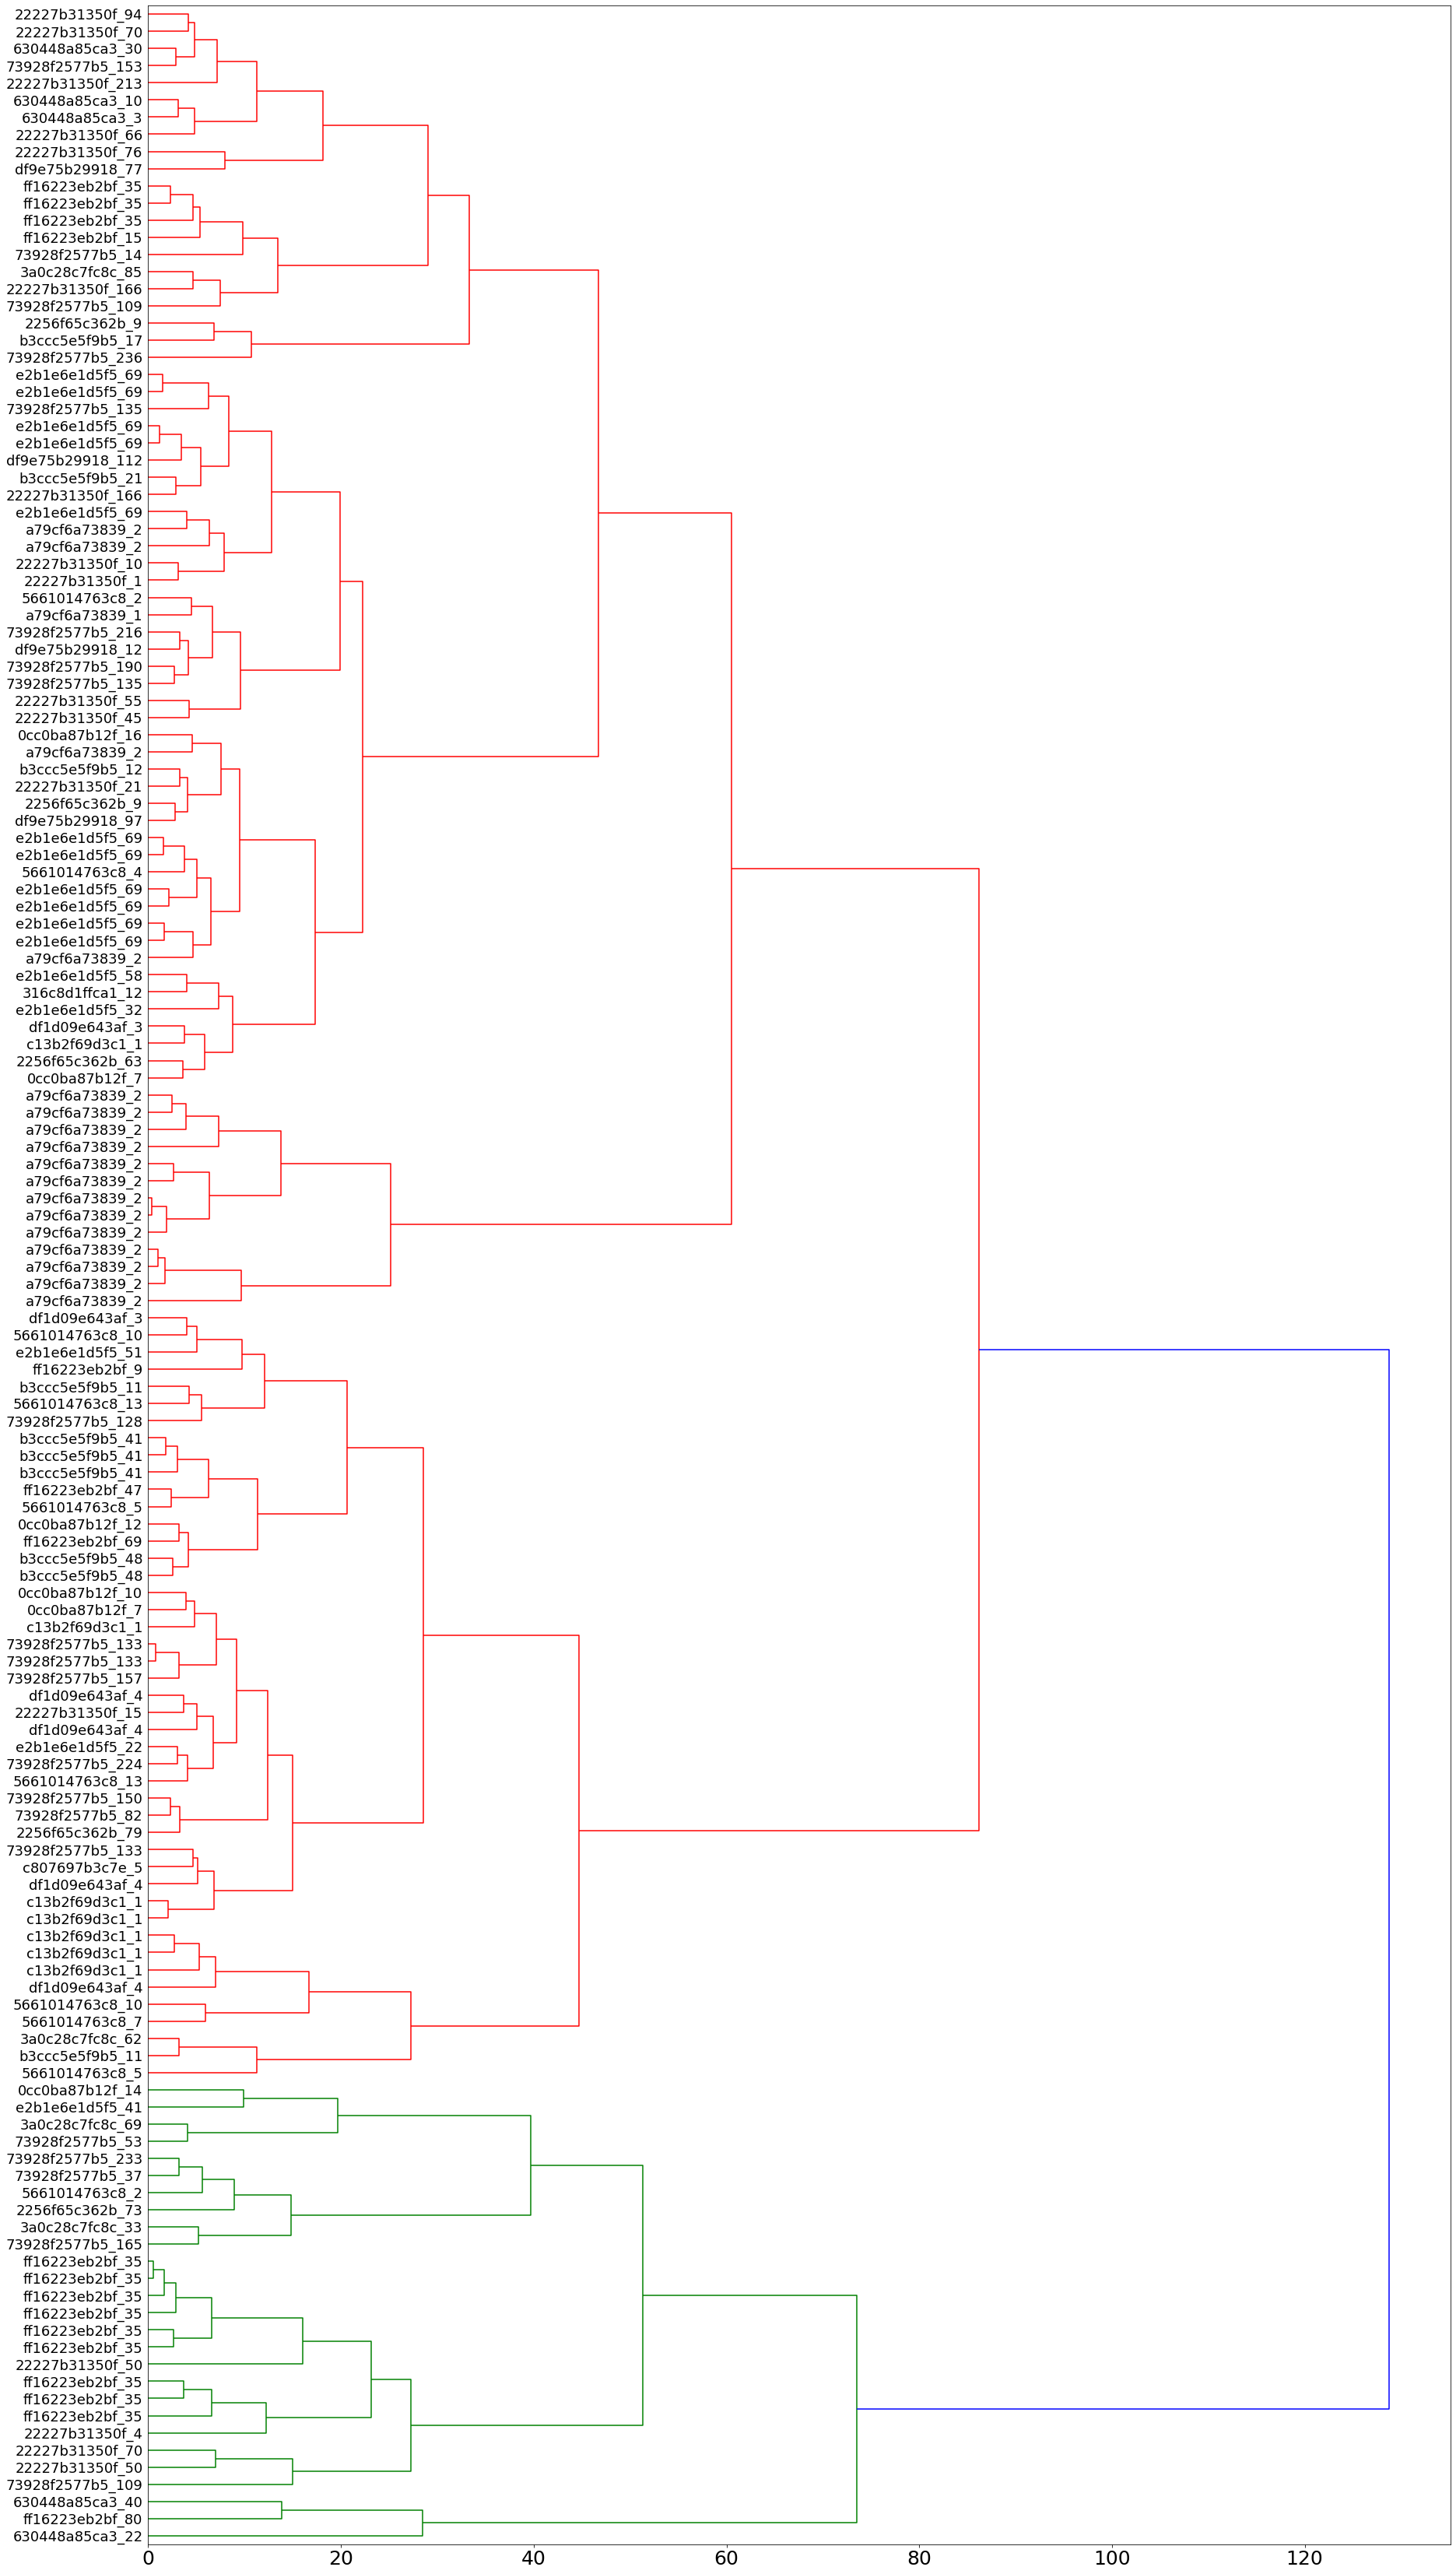

In [22]:
plt.figure(figsize=(30,60))
p=dendrogram(mergings,labels=prod_appearance, leaf_rotation=0, leaf_font_size=26, orientation='right')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=25)
ax.tick_params(axis='y', which='major', labelsize=18)
plt.savefig('dendro_norm.pdf')

In [23]:
# Einzelne Produkte werden abwechselt produziert
# Bei einem schlecht funktionierenden Trockner würden sich auch für das darauf folgende Produkt Abweichungen ergeben
# Bei fehlerhafte Produktionsbedingungen wären die Chargen der normierten Produkte untereinader gestreut verteilt, da Abweichungen auch für die darauffolgenden anderen produzierten Produkte gelten würden  
## Das übrige Dendrogramm zeigt keine Auffälligkeiten, die Ursache für die Abweichungen sind nicht an fehlerhaften Prozessbedingungen festzumachen